# Assignment 2: Preparing a Data Set for Modeling

In [2]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

In this assignment, you will practice the second and third steps of the machine learning life cycle and begin preparing data so that it can be used to train a machine learning model that solves a regression problem. Note that by the end of the exercise, your data set wont be completely ready for the modeling phase, but you will gain experience using some common data preparation techniques. You will complete the following tasks to transform your data:

1. Build your data matrix (DataFrame) and define your ML Problem:
    * Load the "Census Income" data set into a DataFrame and inspect the data
    * Define the label - what are you predicting?
    * Identify features
2. Clean your data:
    * Handle outliers by building a new regression label column by winsorizing outliers
    * Handle missing data by replacing all missing values in the dataset with means
3. Explore your data:
    * Identify two features with the highest correlation with label
    * Build appropriate bivariate plots to visualize the correlations between features and the label 
4. Analysis:
    * Analyze feature engineering techniques that should be used to prepare the data for modeling

## Part 1. Build Your Data Matrix (DataFrame) and Define Your ML Problem

<b>Note</b>: for the purpose of this course, we will use data matrix and DataFrame interchangeably. 

####  Load a Data Set and Save it as a Pandas DataFrame

So far, in these exercises, we have been using a small subset of the "Census income" dataset. We will now use a version that has a substantially greater number of rows, but the same number of columns as before. You will see this reflected when you print out the dimensions of your DataFrame after you load your data.

Use the specified file name to load the data. Save it as a Pandas DataFrame called `df`.

**Task**: Read in the data using the `pd.read_csv()` function and save it to DataFrame `df`. <i>Note<i>: use the variable `filename` in your call to `pd.read_csv()`.

In [3]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "censusData.csv")

In [10]:
# YOUR CODE HERE
df = pd.read_csv(filename, header=0)

#### Inspect the Data

**Task**: Display the shape of `df` -- that is, the number of rows and columns.

In [11]:
# YOUR CODE HERE
df.shape
print("rows: " + str(df.shape[0]))
print("cols: " + str(df.shape[1]))

rows: 32561
cols: 15


*Check your work*: while we used a small subset of the Census dataset in the exercises, the dataset that we are using now has a substantially greater number of rows, but the same number of columns as before. You should see this reflected when you print out the dimensions of DataFrame `df`.

**Task**: Get a peek of the data by displaying the first few rows, as you usually do.

In [12]:
# YOUR CODE HERE
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


#### Define the Label

Assume that your goal is to train a machine learning model that predicts the number of years of education that a person has had. This is an example of supervised learning and is a regression problem; it requires a label that contains real or continuous numbers. In our dataset, our label will be the `education-num` column. Let's inspect the values in the `education-num` column.

In [13]:
df['education-num']

0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name: education-num, Length: 32561, dtype: int64

#### Identify Features

For now, our features will be all of the remaining columns in the dataset. 

**Task**: In the code cell below, create a list containing the features in the dataset.

In [16]:
# YOUR CODE HERE
features = [col for col in df.columns if col != "education-num"]

## Part 2. Clean Your Data

Part of data preparation involves cleaning "dirty" data. Two common data cleaning techniques involve the handling of outliers and missing data.

### a. Handle Outliers

Let us prepare the data in our label column. Namely, we will detect and replace outliers in the data using winsorization.

We will create a new version of the `education-num` column, in which we replace the outlier values of `education-num` (on both sides of the range -- the low end as well as the high end). We will replace the outliers with the corresponding percentile value, as we did in the exercises. That is, if we wish to replace any value below, say, the 1.234-th percentile, we shall replace all such values by the exact same value in our data -- the value such that 1.234% of data lies below it.

We will need to import the `stats` module from the `scipy` package:

In [17]:
import scipy.stats as stats

**Task**: Create a new column, titled `education_years` by winsorizing the `education-num` column with the top and bottom 1% percentile values.

In [19]:
# YOUR CODE HERE
df['education_years'] = stats.mstats.winsorize(df['education-num'], limits=[0.01, 0.01])


Let's verify that a new column got added to the DataFrame:

In [20]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income,education_years
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,13
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,13
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,9
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,7
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,13


An interesting thing to think about: take a look at the data and notice that for the first five rows, the values of the `education-num` column and its winsorized version -- `education_years` -- are the same. Does this mean that winsorization did not work? Or are there discrepancies further down the list of rows, where we cannot see them?

**Task**: Check that the values of `education-num` and `education_years` are *not* identical. You may do this by subtracting the two columns and then listing the unique values of the result. If you see values other than zero, it means *some* change did happen, as we would expect.

In [23]:
# YOUR CODE HERE
difference = df['education-num'] - df['education_years']
print(difference.unique())

[ 0 -1 -2]


### b. Handle Missing Data

Next, we are going to find missing values in our entire dataset and impute the missing values by
replacing them with means. This process is a common task in feature engineering.

####  Identifying missingness

**Task**: Check if a given value in any data cell is missing, and sum up the resulting values (`True`/`False`) by columns. Assign the results to variable `nan_count`. Print the results.

In [24]:
nan_count = df.isnull().sum()

nan_count

age                 162
workclass          1836
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation         1843
relationship          0
race                  0
sex_selfID            0
capital-gain          0
capital-loss          0
hours-per-week      325
native-country      583
income                0
education_years       0
dtype: int64

Replacing the missing values with the mean only makes sense for the numerically valued columns (and not for strings). Hence, we will focus on the `age` and `hours-per-week` columns.

#### Keeping record of the missingness: creating dummy variables 

As a first step, you will now create dummy variables indicating missingness of the values.

**Task**: Store the `True`/`False` series that indicate missingness of any value in `age` as a new column called `age_na`. Store the `True`/`False` series that indicate missingness of every value of `hours-per-week` as a new column called `hours-per-week_na`.

In [25]:
# YOUR CODE HERE
df['age_na'] = df['age'].isnull()
df['hours-per-week_na'] = df['hours-per-week'].isnull()

#### Replacing the missing values with mean values of the column

**Task**: Fill the missing values of the `age` and `hours-per-week` columns with the mean value of the corresponding columns.

In [26]:
# YOUR CODE HERE
mean_age = df['age'].mean()
mean_hours_per_week = df['hours-per-week'].mean()

df['age'].fillna(mean_age, inplace=True)
df['hours-per-week'].fillna(mean_hours_per_week, inplace=True)

<b>Task</b>: Check your results. Display the sum of missing values in the `age` column.

In [27]:
# YOUR CODE HERE
df['age'].isnull().sum()

0

## Part 3. Explore Your Data 

You will now perform exploratory data analysis in preparation for selecting your features as part of feature engineering. So far we identified all columns in the dataset to serve as features, but not all features may be suitable for our machine learning problem. While feature engineering involves transforming your features into proper formats (e.g. transforming numerical data into binary values), it also includes selecting appropriate features for modeling. By exploring your data, you will identify trends, patterns, and interdependence among features and the label. This will enable you to choose the appropriate features to use for training your machine learning model.

#### Identify Correlations
In particular, we will focus on identifying which features in the data have the highest correlation with the label. In the next few cells, we will demonstrate how to use Pandas `corr()` method to get a list of correlation coefficients between the `label` and all other numerical features.  To learn more about the `corr()` method, consult the online [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

Let's first galnce at what the `corr()` method does:

In [28]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education_years,age_na,hours-per-week_na
age,1.000000e+00,-0.076085,0.036685,0.124705,0.057478,6.657191e-02,0.038549,7.101579e-18,-4.325250e-05
fnlwgt,-7.608468e-02,1.000000,-0.043195,-0.002234,-0.010252,-1.804716e-02,-0.042134,-9.015193e-03,-5.769619e-03
education-num,3.668517e-02,-0.043195,1.000000,0.167089,0.079923,1.465533e-01,0.999182,-1.708530e-03,-5.670679e-03
capital-gain,1.247046e-01,-0.002234,0.167089,1.000000,-0.055138,1.009947e-01,0.168202,-5.313515e-03,4.981172e-03
capital-loss,5.747841e-02,-0.010252,0.079923,-0.055138,1.000000,5.420158e-02,0.080453,-7.205893e-03,-1.511760e-03
hours-per-week,6.657191e-02,-0.018047,0.146553,0.100995,0.054202,1.000000e+00,0.147275,2.254277e-03,7.385613e-17
education_years,3.854869e-02,-0.042134,0.999182,0.168202,0.080453,1.472753e-01,1.000000,-1.955584e-03,-5.811006e-03
age_na,7.101579e-18,-0.009015,-0.001709,-0.005314,-0.007206,2.254277e-03,-0.001956,1.000000e+00,-2.709086e-03
hours-per-week_na,-4.325250e-05,-0.005770,-0.005671,0.004981,-0.001512,7.385613e-17,-0.005811,-2.709086e-03,1.000000e+00


The result is a computed *correlation matrix*. The values on the diagonal are all equal to 1 because they represent the correlations between each column with itself. The matrix is symmetrical with respect to the diagonal.<br>

We only need to observe correlations of all features with the column `education_years` (as opposed to every possible pairwise correlation). Se let's query the `education_years` column of this matrix:

In [29]:
df.corr()['education_years']

age                  0.038549
fnlwgt              -0.042134
education-num        0.999182
capital-gain         0.168202
capital-loss         0.080453
hours-per-week       0.147275
education_years      1.000000
age_na              -0.001956
hours-per-week_na   -0.005811
Name: education_years, dtype: float64

This is good, but contains two values too many: we do not need to observe the correlation of `education_years` with itself, and moreover we are not interested in the correlation between the label and `education-num` (recall that `education_years` is a winsorized version of the `education-num`). So we will exclude these two values using the Pandas `drop()` method:

In [30]:
exclude = ['education_years','education-num']
df.corr()['education_years'].drop(exclude, axis = 0)

age                  0.038549
fnlwgt              -0.042134
capital-gain         0.168202
capital-loss         0.080453
hours-per-week       0.147275
age_na              -0.001956
hours-per-week_na   -0.005811
Name: education_years, dtype: float64

**Task**: The code below performs the same operation above, but saves the result to variable `corrs`. Sort the values in `corrs` in descending order. Use the Pandas method `sort_values()`  to accomplish this task. For more information on how to use the `sort_values()` method, consult the online [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_values.html).

In [31]:
# Do not remove or edit the line below:
corrs = df.corr()['education_years'].drop(exclude, axis = 0)

corrs_sorted = corrs.sort_values(ascending=False)

**Task**: Use Pandas indexing to extract the *column names* for the top two correlation values and save to a Python list called `top_two_corr`. <br>
_Tip_: `corrs_sorted` is a Pandas `Series` object, in which column names are the *index*. Once you find the column names, use the Python `list()` method to convert the values into a Python `list`.

In [32]:
top_two_corr = corrs_sorted.index[:2].tolist()

top_two_corr

['capital-gain', 'hours-per-week']

Now that we have identified the two features that have the highest correlation with the label, let us find the correlation between both features.

**Task**: Use the `corr()` method to find the correlation between the two features. Save the result to variable `corr_features`. 

In [33]:
corr_features = df[top_two_corr].corr().iloc[0, 1]

corr_features

0.10099466083718467

#### Bivariate Plotting: Produce Plots for the Label and Its Top Correlates

Let us visualize our data.

We will use the `scatterplot()` function in `seaborn` to plot the relationships between the two features we just identified and the label. For more information about the function, consult the online [documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

We will create a DataFrame named ` df_corr1` that contains two columns from DataFrame `df`: the label, and the first of the two columns which correlate with it the most:

In [48]:
df_corr1 = df[['education_years', top_two_corr[0]]]
df_corr1

,education_years,capital-gain
0,13,2174
1,13,0
2,9,0
3,7,0
4,13,0
...,...,...
32556,12,0
32557,9,0
32558,9,0
32559,9,0


<b>Task</b>: Create a `seaborn` scatterplot of the new DataFrame that you just created. Since our DataFrame has thousands of rows, only plot the first 50 rows to better visualize the data.

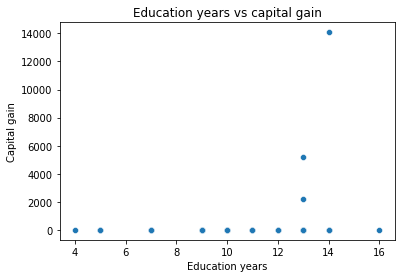

In [49]:
# YOUR CODE HERE
sns.scatterplot(data=df_corr1.head(50), x='education_years', y='capital-gain')
plt.title('Education years vs capital gain')
plt.xlabel('Education years')
plt.ylabel('Capital gain')
plt.show()

**Task**: Now create a DataFrame named ` df_corr2` that contains two columns from DataFrame `df`: the label, and the second of the two columns which correlate with it the most. 

In [50]:
df_corr2 = df[['education_years', top_two_corr[1]]] # 2nd of 2 cols


df_corr2

,education_years,hours-per-week
0,13,40.0
1,13,13.0
2,9,40.0
3,7,40.0
4,13,40.0
...,...,...
32556,12,38.0
32557,9,40.0
32558,9,40.0
32559,9,20.0


<b>Task</b>: Create a `seaborn` scatterplot of the new DataFrame that you just created. Once again, only plot the first 50 rows to better visualize the data.

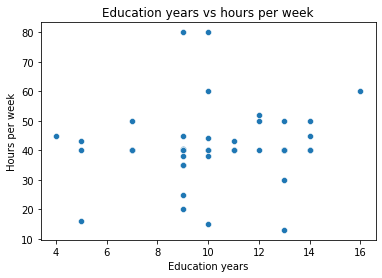

In [52]:
# YOUR CODE HERE
sns.scatterplot(data=df_corr2.head(50), x='education_years', y='hours-per-week')
plt.title('Education years vs hours per week')
plt.xlabel('Education years')
plt.ylabel('Hours per week')
plt.show()

**Task**: Now let's visualize the correlation between both features. Create a DataFrame named ` df_corr3` that contains two columns from DataFrame `df`: the two feature columns that correlate most with the label. 

In [53]:
df_corr3 = df[[top_two_corr[0], top_two_corr[1]]]

df_corr3

,capital-gain,hours-per-week
0,2174,40.0
1,0,13.0
2,0,40.0
3,0,40.0
4,0,40.0
...,...,...
32556,0,38.0
32557,0,40.0
32558,0,40.0
32559,0,20.0


<b>Task</b>: Create a `seaborn` scatterplot of the new DataFrame that you just created. One again, only plot the first 50 rows to better visualize the data.

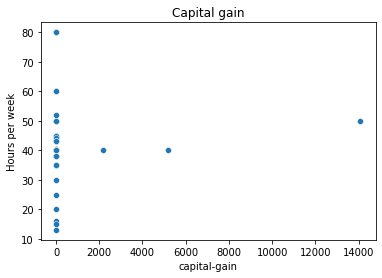

In [54]:
# YOUR CODE HERE
sns.scatterplot(data=df_corr3.head(50), x='capital-gain', y='hours-per-week')
plt.title('Capital gain')
plt.ylabel('Hours per week')
plt.show()

So far we have been visualizing a subset of the data. Let's now create a visualization of all of the data.

**Task**: Create a DataFrame named ` df_corrs` that contains these three columns from DataFrame `df`: the label, and the two columns which correlate with it the most.


In [55]:
df_corrs = df[['education_years', top_two_corr[0], top_two_corr[1]]]

df_corrs

,education_years,capital-gain,hours-per-week
0,13,2174,40.0
1,13,0,13.0
2,9,0,40.0
3,7,0,40.0
4,13,0,40.0
...,...,...,...
32556,12,0,38.0
32557,9,0,40.0
32558,9,0,40.0
32559,9,0,20.0


We will use the `pairplot()` function in `seaborn` to plot the data in `df_corrs`. For more information about the function, consult the online [documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

<b>Task</b>: To better visualize the data and prevent overlapping of data points, call the `pairplot()` function with the following parameters:
* Use `kind = 'kde'` to specify the *kernel density estimator* as the *kind* of the plot.
* Use `corner=True` to make sure you don't plot redundant (symmetrical) plots.

Note: This will take a few minutes to run and produce a plot.

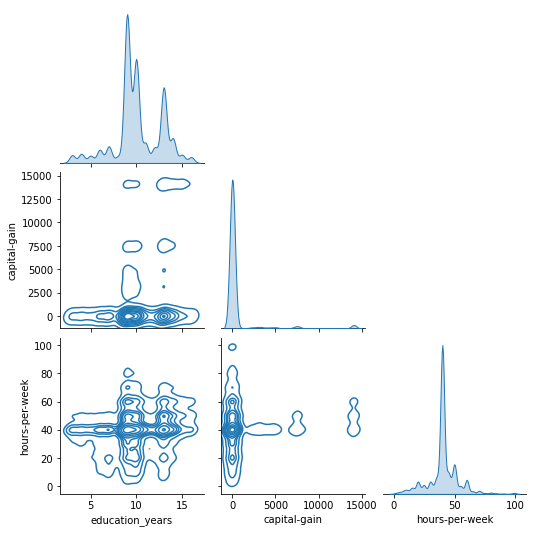

In [56]:
# YOUR CODE HERE
sns.pairplot(df_corrs, kind='kde', corner=True)
plt.show()

Think about the possible interpretations of this plot. Here is an example of the kind of stories this data seems to be telling. It appears as though hours per week are stacked around the typical 40-hour value, and that this value of weekly hours dominates regardless of the level of education. However, it seems that it is somewhat less typical for people with lower levels of formal education to be working over 65 hours a week.

## Part 4. Analysis

1. Based on what you have learned in this unit, try to interpret what you have discovered about the relationships between the features and the label in this exercise. Are the top two correlated features strongly or weakly correlated with the label? What about the remaining features? Are the two features strongly or weakly correlated with each other? Based on these answers, do these features seem appropriate to use for our machine learning problem? Are there other considerations that should be taken when selecting features for this problem (e.g. selecting different data, removing/adding features)?

2. Inspect the data in your data matrix. Describe other feature engineering techniques that should be used to make the data suitable for modeling.

Record your findings in the cell below.

We see that both features, capital-gain and hours-per-week, are mostly weekly but positively correlated with the label. The remaining features are all very weakly positively or very weakly negatively correlated. Capital gain and hours per week are also weakly correlated with each toher. Thus, they might not be the best choice (at least as of now) to use for our machine learning problem, because their weak correlation with the label won't be very helpful in predictions. Some considerations in selecting features are that we could consider combining features and checking their combination's correlation with the label.
When we look at our data matrix, we see there are lots of non-numerical/categorical features that we did not consider. We could try getting numerical information out of them and combining them with our current features to improve.